In [1]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git

In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime.fake_provider import FakeBurlingtonV2 as FakeDevice
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
from ECC2025.testing import test_1a, test_1b

En la década de 1930, el físico Albert Einstein, junto con sus colegas Podolsky y Rosen, formuló la famosa paradoja EPR (Einstein-Podolsky-Rosen), un experimento mental que desafiaba la comprensión tradicional de la mecánica cuántica. En esta propuesta, argumentaron que dos partículas podían estar "entrelazadas", lo que implicaba que el estado de una partícula estaba intrínsecamente relacionado con el estado de la otra, sin importar la distancia que las separara. Esta noción desafiaba el principio de localidad, sugiriendo que una acción en una partícula podría influir instantáneamente en la otra, lo que Einstein describía como una "acción fantasmal a distancia". La paradoja EPR ha sido fundamental en el estudio de la física cuántica, impulsando numerosas investigaciones sobre las interacciones y conexiones entre partículas. Para una visión más profunda de este tema, se puede consultar el artículo original de Einstein y sus colegas en [Physical Review](https://cds.cern.ch/record/405662/files/PhysRev.47.777.pdf).

Avanzando varias décadas, en 1989, los físicos Daniel Greenberger, Michael Horne y Anton Zeilinger ampliaron el concepto de entrelazamiento al demostrar que no solo dos partículas podían estar correlacionadas, sino que configuraciones más complejas que involucraban tres o más partículas también podían ser entrelazadas. Esta innovación dio origen al estado GHZ (Greenberger-Horne-Zeilinger), una forma de entrelazamiento aún más rica y sorprendente. A diferencia del entrelazamiento de pares de partículas, donde la relación se limita a dos, el estado GHZ revela cómo múltiples partículas pueden estar interconectadas de tal manera que sus estados son completamente dependientes unos de otros. Este avance no solo desafió las nociones tradicionales de la mecánica cuántica, sino que también proporcionó un marco conceptual más amplio para entender las interacciones cuánticas. Para más detalles, se puede consultar el trabajo de Greenberger, Horne y Zeilinger en el artículo disponible en [arXiv](https://arxiv.org/abs/0712.0921). La importancia de la investigación en entrelazamiento cuántico fue reconocida con el Premio Nobel de Física 2022, que se otorgó a Alain Aspect, John F. Clauser y Anton Zeilinger por sus experimentos que verificaron las predicciones de la mecánica cuántica en sistemas entrelazados; más información se puede consultar en [Nobel Prize](https://www.nobelprize.org/prizes/physics/2022/summary/).

Matemáticamente, el estado GHZ de $ n $ qubits se expresa como:

$$|GHZ_n\rangle = \frac{1}{\sqrt{2}}\left( |0\dots0\rangle + |1\cdots1\rangle \right).$$

Esto indica que el estado puede ser simultáneamente $ |0\rangle $ en todos los qubits o $ |1\rangle $ en todos ellos. Así, al medir uno de los qubits, se puede predecir con certeza el resultado de los demás, independientemente de la distancia que los separa. Por ejemplo, en un estado GHZ de cuatro qubits ($ n=4 $), la expresión se convierte en:

$$|GHZ_4\rangle = \frac{1}{\sqrt{2}}\left( |0000\rangle + |1111\rangle \right).$$

Esto significa que si se mide un qubit y se encuentra en el estado $ |0\rangle $, todos los otros qubits también estarán en $ |0\rangle $; de igual manera, si se mide un qubit y se encuentra en $ |1\rangle $, los demás qubits estarán en $ |1\rangle $. Este fenómeno ilustra la naturaleza no clásica del entrelazamiento cuántico, donde las partículas están correlacionadas de tal manera que su comportamiento no puede describirse de forma independiente.


En la práctica para implementar un estado GHZ , utilizamos un circuito cuántico que establece estas interconexiones. Durante el taller, aprendimos a crear un estado GHZ utilizando qubits. El circuito diseñado para preparar un estado GHZ de cuatro qubits ($ n=4 $) se construye de la siguiente manera:


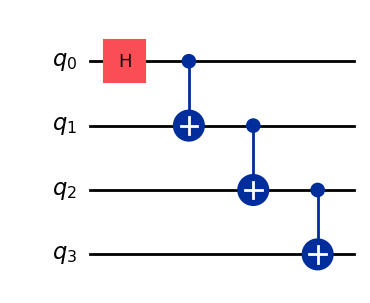

In [3]:
n_qubits = 4
qc_ghz = QuantumCircuit( n_qubits )
qc_ghz.h(0)
for j in range(n_qubits-1):
    qc_ghz.cx(j,j+1)

qc_ghz.draw('mpl')

In [4]:
#state = Statevector( qc_ghz )
#state.draw("latex")

En este circuito, se aplica una puerta Hadamard al primer qubit, colocándolo en una superposición de $ |0\rangle $ y $ |1\rangle $. Luego, se utilizan puertas CNOT en forma de escalera para entrelazar los qubits restantes. Este proceso secuencial establece las conexiones entre los qubits, asegurando que todos compartan el estado GHZ.

Este diseño refleja cómo se establecen las conexiones entre los qubits paso a paso, profundizando el entrelazamiento cuántico a medida que se añaden más qubits al sistema. La profundidad del circuito resultante es $ n $, dado que cada puerta CNOT se aplica de manera secuencial.

In [5]:
qc_ghz.depth()

4

Este enfoque es beneficioso porque es lineal en el número de qubits. Sin embargo, existe una forma alternativa de implementar estados GHZ generalizados cuya profundidad es incluso menor que $ n $.

__Desafio:__ Ahora que has aprendido a preparar un estado GHZ utilizando un circuito cuántico y comprendido su funcionamiento, se te invita a encontrar una implementación alternativa para el caso particular de $ n=4 $, que logre una profundidad de solo $ 3 $. Este ejercicio no solo te permitirá explorar nuevas formas de implementar el entrelazamiento cuántico, sino que también te brindará una mejor comprensión de la eficiencia en los circuitos cuánticos. Escribe tu solución en el circuito `qc_ghz_op`, definido en la siguiente celda.


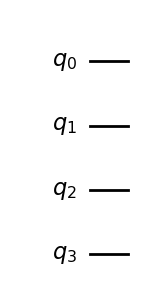

In [6]:
qc_ghz_op = QuantumCircuit( n_qubits )

### escribe tu solución aca ###

###############################
qc_ghz_op.draw('mpl')

In [7]:
## Esto verifica tu solución, no cambiar!!!! ##
test_1a(qc_ghz_op)

El circuito no prepara un estado GHZ


En el desafío anterior, exploramos la forma más eficiente de implementar un estado GHZ en $4$ qubits. Sin embargo, esta estrategia puede no ser siempre la más inteligente. Esto se debe a que los computadores cuánticos tienen conectividad limitada, es decir, no todos los qubits están conectados entre sí. Tomemos como ejemplo el siguiente dispositivo cuántico de IBM de $5$ qubits:

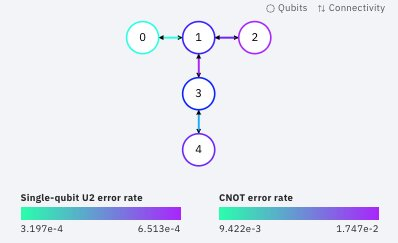

En esta imagen, podemos observar que el qubit $0$ está conectado únicamente al qubit $1$, mientras que el qubit $1$ tiene conexiones con los qubits $0, 2$ y $3$. Si deseamos implementar un estado GHZ utilizando los qubits $0, 1, 2$ y $3$ de este dispositivo, notamos que los qubits $2$ y $3$ no están directamente conectados. Esto nos obliga a descomponer la última puerta CNOT en una secuencia de $4$ puertas CNOT:

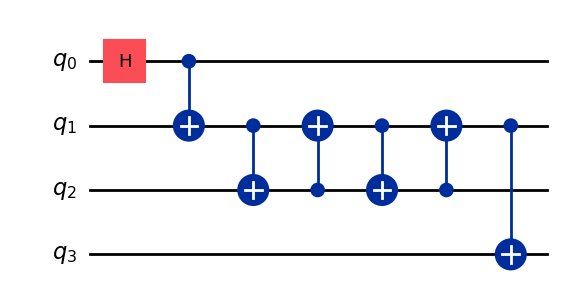

In [8]:
qc_ghz_device = QuantumCircuit( n_qubits )
qc_ghz_device.h(0)
for j in range(n_qubits-2):
    qc_ghz_device.cx(j,j+1)

qc_ghz_device.cx(2,1)
qc_ghz_device.cx(1,2)
qc_ghz_device.cx(2,1)
qc_ghz_device.cx(1,3)

qc_ghz_device.draw('mpl')

Una vez construido el circuito, es crucial asegurarse de que realmente implementa el estado GHZ de manera correcta. Para lograrlo, podemos representar el vector de estado resultante:

In [9]:
state = Statevector( qc_ghz_device )
state.draw("latex")

<IPython.core.display.Latex object>

Esta visualización nos permite confirmar que el circuito ha generado el estado entrelazado esperado. Sin embargo, es importante considerar que la profundidad del circuito ha aumentado debido a la necesidad de utilizar más puertas cuánticas. Esto puede impactar negativamente la calidad de la ejecución en un computador cuántico real:

In [10]:
qc_ghz_device.depth()

7

Este incremento en la profundidad significa que la ejecución de este circuito en un entorno real podría resultar en un rendimiento inferior, ya que más puertas cuánticas implican mayor susceptibilidad al ruido y a errores operativos. Por lo tanto, es esencial no solo validar el diseño del circuito, sino también simular su comportamiento en condiciones que imiten un dispositivo cuántico real.

Para ilustrar cómo la calidad de la implementación se ve afectada por la profundidad del circuito y el ruido presente en el dispositivo, realizamos una simulación que considera un modelo realista del dispositivo cuántico. Utilizamos un backend simulado que incorpora características de ruido típicas de un entorno cuántico real:

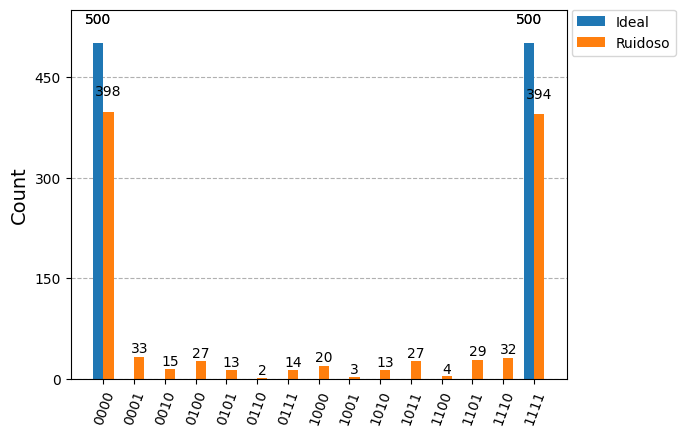

In [11]:
device_backend = FakeDevice()
simulator_noise = AerSimulator.from_backend(device_backend)
qc_ghz_device_measured = qc_ghz_device.copy()
qc_ghz_device_measured.measure_all()
qc_ghz_device_measured =  transpile( qc_ghz_device_measured, device_backend, optimization_level=0 )
counts_device = simulator_noise.run( qc_ghz_device_measured ).result().get_counts()

counts_ideal = { '0000':500, '1111':500  }
plot_histogram( [counts_ideal, counts_device], legend=['Ideal','Ruidoso'] )

En esta simulación, comparamos los resultados ideales con los obtenidos en un entorno ruidoso, lo que nos permite visualizar cómo la calidad de la implementación se ve afectada por la profundidad del circuito y el ruido presente en el dispositivo. Esta evaluación es esencial para entender las limitaciones de los circuitos cuánticos en situaciones prácticas, ya que el ruido puede distorsionar los resultados esperados y dificultar la implementación de algoritmos cuánticos complejos.

__Desafio final:__ Ahora que hemos explorado tanto la implementación del estado GHZ como su evaluación en un entorno simulado, te invitamos a aplicar tus conocimientos en un nuevo desafío. Construye un circuito cuántico que implemente un estado GHZ de $4$ qubits en el dispositivo cuántico presentado anteriormente, asegurándote de que la profundidad del circuito sea de solo $4$. Este ejercicio no solo pondrá a prueba tu comprensión de las conexiones cuánticas y las limitaciones de los circuitos, sino que también te permitirá desarrollar una solución más eficiente teniendo en cuenta el ruido y la conectividad.

Escribe tu solución en el circuito ``qc_ghz_device_op``, definido en la siguiente celda. Recuerda que este desafío es una oportunidad para experimentar con la optimización en el diseño de circuitos cuánticos, así como para fortalecer tu comprensión sobre la importancia de la conectividad y la eficiencia en la ejecución de algoritmos cuánticos.

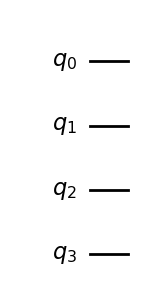

In [12]:
qc_ghz_device_op = QuantumCircuit( n_qubits )

### escribe tu solución aca ###

###############################

qc_ghz_device_op.draw('mpl')

Podemos verificar si el circuito funciona mejor que el anterior a través de una simulación con ruido. Como la simulación es un experimento aleatorio, quizás debas ejecutarlo varias veces para convencerte del resultado.

In [13]:
qc_ghz_device_op.depth()

0

In [14]:
state = Statevector( qc_ghz_device_op )
state.draw("latex")

<IPython.core.display.Latex object>

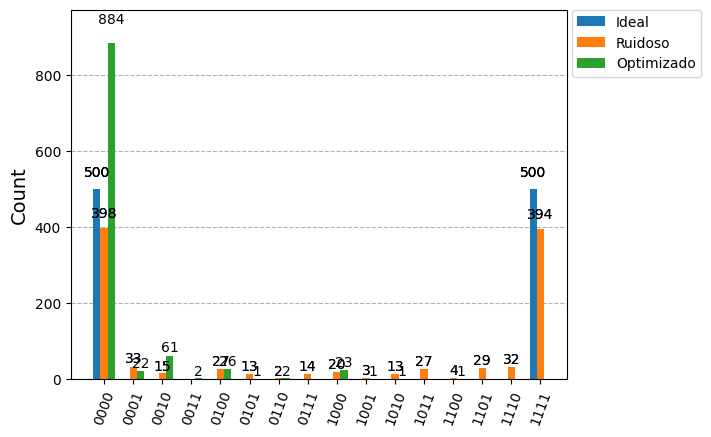

In [15]:
qc_ghz_op_measured = qc_ghz_device_op.copy()
qc_ghz_op_measured.measure_all()
qc_ghz_op_measured =  transpile( qc_ghz_op_measured, device_backend, optimization_level=0 )
counts_op = simulator_noise.run( qc_ghz_op_measured ).result().get_counts()

plot_histogram( [counts_ideal, counts_device, counts_op], legend=['Ideal','Ruidoso', 'Optimizado']  )

In [16]:
## Esto verifica tu solución, no cambiar!!!! ##
test_1b( qc_ghz_device_op )

El circuito no prepara un estado GHZ


¡felicitaciones por tu esfuerzo y dedicación! Has dado un paso significativo en el entendimiento de los circuitos cuánticos y el entrelazamiento. Este conocimiento te será invaluable en tu camino en el fascinante mundo de la computación cuántica. ¡Sigue explorando y experimentando!